In [1]:
# Standard Scaler

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import random
from Skriptai.manofunkcijos import *

import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver # naršyklės kontroleris
from selenium.webdriver.chrome.options import Options #Naršyklės
# pip install beautifulsoup4 selenium
import time

In [48]:
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM autopliuslt2;'  # SQL užklausa, kurią norite vykdyti

autoplius = query_to_dataframe(db_path, query)

In [49]:
autoplius

,id,Markė,Modelis,Kaina,Miestas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,...,"CO₂ emisija, g/km",Mieste,Užmiestyje,Vidutinės,Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis
0,1,-Kita-,-kita-,1750,"Utena, Lietuva",2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,...,None,None,None,None,None,None,None,None,None,None
1,2,-Kita-,-kita-,3900,"Jurbarkas, Lietuva",2011,Elektra,Sedanas,2/3,None,...,None,None,None,None,None,None,None,None,None,None
2,3,-Kita-,-kita-,6800,"Kėdainiai, Lietuva",2020-02,Elektra,Hečbekas,2/3,None,...,None,None,None,None,None,None,None,None,None,None
3,4,-Kita-,-kita-,60500,"Vilnius, Lietuva",2024,Elektra,Krovininis mikroautobusas,4/5,None,...,None,None,None,None,None,None,None,None,None,None
4,5,Abarth,124 Spider,18900,"Kaunas, Lietuva",2017,Benzinas,Kabrioletas,2/3,Mechaninė,...,148 g/km,"8,5","5,1","6,4",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39440,39441,Volvo,XC60,29000,"Klaipėda, Lietuva",2019,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,241 g/km,"9,5","6,5","7,5",None,None,None,None,None,None
39441,39442,Volvo,XC90,29700,"Trakai, Lietuva",2019-02,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,None,11,8,9,None,None,None,None,None,None
39442,39443,Volvo,XC90,29800,"Vilnius, Lietuva",2019,Dyzelinas,Visureigis / Krosoveris,4/5,Automatinė,...,149 g/km,"6,2","5,4","5,7",None,None,None,None,None,None
39443,39444,Volvo,XC40,29850,"Plungė, Lietuva",2022-05,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,~ 174 g/km,None,None,None,None,None,None,None,None,None


In [50]:
autoplius_df = autoplius[['Markė', 'Modelis', 'Kuro tipas', 'Pirma registracija', 'Rida', 'Variklis', 'Kaina']]

In [51]:
dft = autoplius_df.copy()

In [52]:
def kw(x):
    if x != None:
        if 'kW' in x:
            return int((np.ceil(int(x.split('(')[1].replace('kW)',''))/20))*20)
        else:
            return None
    else:
        return None

In [53]:
dft['Kaina'] = dft['Kaina'].apply(lambda x: float(x))
dft['Rida'] = dft['Rida'].apply(lambda x: x[:-3].replace(' ','') if x != None else x)
dft['Amžius'] = dft['Pirma registracija'].apply(lambda x: int(2024-int(x[:4])) if x!= None else x)
dft['Galingumas'] = dft['Variklis'].apply(kw)

In [54]:
df_for_model = dft[['Markė', 'Amžius', 'Kuro tipas', 'Rida', 'Galingumas', 'Kaina']]

In [55]:
df_for_model = df_for_model.dropna().reset_index().drop(columns='index'); df_for_model

,Markė,Amžius,Kuro tipas,Rida,Galingumas,Kaina
0,-Kita-,4.0,Elektra,14000,40.0,6800.0
1,Abarth,7.0,Benzinas,75000,140.0,18900.0
2,Acura,11.0,Benzinas,217262,240.0,9500.0
3,Acura,14.0,Benzinas,76055,240.0,11500.0
4,Acura,20.0,Benzinas,230000,200.0,1500.0
...,...,...,...,...,...,...
37398,Volvo,5.0,Benzinas,92000,200.0,29000.0
37399,Volvo,5.0,Benzinas,135000,240.0,29700.0
37400,Volvo,5.0,Dyzelinas,219200,180.0,29800.0
37401,Volvo,2.0,Benzinas,23150,200.0,29850.0


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [57]:
gamLE = LabelEncoder()
ktLE = LabelEncoder()
gamLE.fit(df_for_model['Markė'])
df_for_model['Markė'] = gamLE.transform(df_for_model['Markė'])
ktLE.fit(df_for_model['Kuro tipas'])
df_for_model['Kuro tipas'] = ktLE.transform(df_for_model['Kuro tipas'])

In [58]:
df = df_for_model

In [59]:
Y_target = df['Kaina']
X_features = df.drop(columns=['Kaina'])

X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.15, random_state=0)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train[['Amžius', 'Rida', 'Galingumas']])
X_train_scaled = scaler.transform(X_train[['Amžius', 'Rida', 'Galingumas']]); X_train_scaled

array([[ 0.76225491,  1.93435735, -0.06754863],
       [ 1.55185988,  0.27165094,  0.14343589],
       [ 1.0780969 ,  0.48904288, -0.12029476],
       ...,
       [ 0.60433392,  0.56262456, -0.12029476],
       [-0.18527105,  0.15724981, -0.17304089],
       [ 1.39393889,  1.17921152, -0.0148025 ]])

In [61]:
PR_sc, R_sc, V_sc = zip(*X_train_scaled)
X_train['Amžius'] = PR_sc
X_train['Rida'] = R_sc
X_train['Galingumas'] = V_sc ; X_train

,Markė,Amžius,Kuro tipas,Rida,Galingumas
27461,79,0.762255,4,1.934357,-0.067549
30896,11,1.551860,4,0.271651,0.143436
22923,63,1.078097,0,0.489043,-0.120295
8344,29,-0.501113,4,-0.180051,-0.067549
25065,8,-0.816955,0,-0.746757,0.301674
...,...,...,...,...,...
20757,83,1.078097,0,-0.573558,-0.173041
32103,67,-1.290718,4,-1.108104,-0.014802
30403,90,0.604334,4,0.562625,-0.120295
21243,86,-0.185271,2,0.157250,-0.173041


In [62]:
np.std(X_train_scaled)

1.0

In [63]:
np.mean(X_train_scaled)

8.71639616716278e-18

In [64]:
# Apmokinome X_train
# Dabar su standart Scaler rescaliname 
X_test_scaled = scaler.transform(X_test[['Amžius', 'Rida', 'Galingumas']]); X_test_scaled

array([[-0.65903403, -0.46271106, -0.17304089],
       [ 1.2360179 ,  2.03134856, -0.17304089],
       [ 0.44641293, -0.78139645, -0.17304089],
       ...,
       [-0.81695503, -0.71904496,  0.09068976],
       [ 1.39393889,  1.01709765, -0.17304089],
       [-1.76448099, -1.39348025, -0.0148025 ]])

In [65]:
PR_sc, R_sc, V_sc = zip(*X_test_scaled)
X_test['Amžius'] = PR_sc
X_test['Rida'] = R_sc
X_test['Galingumas'] = V_sc ; X_test

,Markė,Amžius,Kuro tipas,Rida,Galingumas
19009,72,-0.659034,6,-0.462711,-0.173041
27701,89,1.236018,1,2.031349,-0.173041
23449,89,0.446413,0,-0.781396,-0.173041
2004,11,-0.659034,4,0.599086,0.143436
6595,20,0.604334,4,0.308369,-0.173041
...,...,...,...,...,...
21859,86,-0.501113,4,0.618048,-0.120295
25312,58,1.551860,0,0.624976,0.248928
34542,90,-0.816955,4,-0.719045,0.090690
34130,89,1.393939,4,1.017098,-0.173041


In [66]:
linearML = LinearRegression() # lininis modelis
linearML.fit(X_train, y_train) # apmokinimas

LinearRegression()

In [67]:
y_predicted = linearML.predict(X_test)

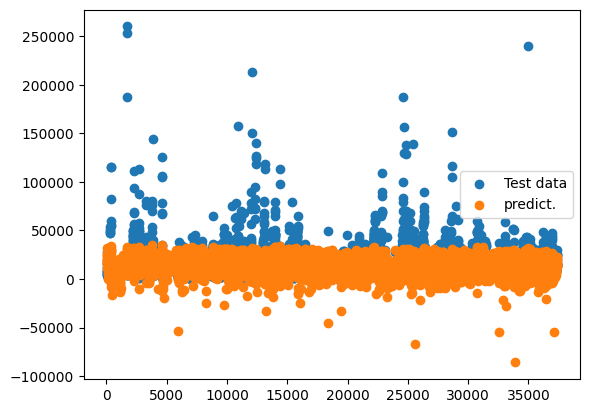

In [68]:
fig, ax = plt.subplots()
ax.scatter(X_test.index, y_test, label='Test data')
ax.scatter(X_test.index, y_predicted, label='predict.')
ax.legend(loc='best')
plt.show()

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [70]:
r2_score(y_test, y_predicted)

0.3353744180116659

In [71]:
mean_squared_error(y_test, y_predicted)

177811208.29862335

In [72]:
rmse = mean_squared_error(y_test, y_predicted)**(1/2)
rmse

13334.58691893466

In [28]:
# MinMaxScaler()

In [29]:
# 3


# El tinklo skirstomojo
# suvartojimas https://data.gov.lt/datasets/2677/#info
# , kas valandą, stambiųjų vart
# https://data.gov.lt/datasets/2678/#info
# .


# Sukurkite
# ir pateikite sekančių 24-rių valandų el. energijos suvartojimo
# spėjimą – 2 ML modelius bei spėjimus, pateiktus tiesiog
# apskaičiuojant vidutinį vartojimą. ML modeliai turi vertinti ir
# tikėtinas oro sąlygas. Palyginkite su NordPool duomenimis,
# paskaičiuokite įverčius (rmse, etc ...). Palyginkite dabar
# gautuosius rezultatus su anksčiau kurtų modelių rezultatais.

# Reikalavimai
# vidurkius kaip prognozę pateikiančiam kodui: kodas turi būti
# realizuotas kaip klasė, kurios pavadinimas averager(). Vidurkių
# apskaičiavimai, kuriuos naudosite prognozei, turi būti realizuoti
# fit() metode. Su predict() metodu, jūs turite galėti
# pasiimti modelio prognozę, nurodytam laikui arba laikų sąrašui.

In [73]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [74]:
weather_df = pd.read_csv('weather_data_2.csv')
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [75]:
weather_df

,date,air_temperature,wind_speed,total_precipitation
0,2023-01-01 00:00:00,7.7,3.9,0.0
1,2023-01-01 01:00:00,8.2,4.6,0.1
2,2023-01-01 02:00:00,8.8,4.6,0.2
3,2023-01-01 03:00:00,8.8,3.6,0.2
4,2023-01-01 04:00:00,8.8,2.7,0.2
...,...,...,...,...
9091,2025-02-08 19:00:00,-4.9,3.5,0.0
9092,2025-02-08 20:00:00,-5.5,3.0,0.0
9093,2025-02-08 21:00:00,-5.8,3.6,0.0
9094,2025-02-08 22:00:00,-6.4,2.5,0.0


In [77]:
smulk =pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/elektra/skirstomojo_tinklo_suvartojimas_mwh.json')
stamb = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/elektra/stambiuju_vartotoju_suvartojimas_mwh.json')
smulk['ltu'] = pd.to_datetime(smulk['ltu'])
stamb['ltu'] = pd.to_datetime(stamb['ltu'])
bendras = pd.merge(smulk, stamb, on='ltu', how='inner')
bendras['Viso'] = bendras['value_x'] + bendras['value_y']
bendras = bendras.drop(columns=['value_x', 'value_y', 'id_x', 'id_y', 'utc_x', 'utc_y'])

bendras['ltu'] = pd.to_datetime(bendras['ltu'])
bendras['month'] = bendras['ltu'].dt.month
bendras['weekday'] = bendras['ltu'].dt.weekday
bendras['hour'] = bendras['ltu'].dt.hour
bendras = pd.merge(bendras, weather_df, left_on='ltu', right_on='date', how='inner')

In [233]:
bendras_for_learn = bendras.drop(columns=['ltu', 'date'])

In [234]:
bendras_for_learn.columns

Index(['Viso', 'month', 'weekday', 'hour', 'air_temperature', 'wind_speed',
       'total_precipitation'],
      dtype='object')

In [235]:
X = bendras_for_learn.drop(columns='Viso')
y = bendras_for_learn['Viso']


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [237]:
decision = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_predicted = decision.predict(X_test)
print(f'Decision tree vertinimas: {decision.score(X_test, y_test)*100.0}')

Decision tree vertinimas: 95.28118412369511


In [238]:
randomforest = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train, y_train)
y_predicted = randomforest.predict(X_test)
print(f'Random forest vertinimas: {randomforest.score(X_test, y_test)*100.0}')

Random forest vertinimas: 97.10281504987461


In [84]:
import csv
import os

def add_entry_to_csv(file_path: str, data: dict):
    """
    Prideda įrašą į CSV failą. Jei CSV failas neegzistuoja arba neturi stulpelių, jie sukuriami.

    :param file_path: CSV failo kelias
    :param data: Žodynas su duomenimis, kuriuos reikia įrašyti
    """
    file_exists = os.path.isfile(file_path)
    
    # Atidarome failą su papildymo (`a`) režimu ir užtikriname UTF-8 kodavimą
    with open(file_path, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=data.keys())

        # Jei failo nėra, rašome antraštes
        if not file_exists:
            writer.writeheader()

        # Pridedame naują įrašą
        writer.writerow(data)

In [232]:
import requests
import pandas as pd
from datetime import timedelta, datetime

def get_weather_data(start_date, end_date):
    current_date = start_date

    while current_date <= end_date:
        try:
            url = f'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/{current_date}'
            print(current_date)
            response = requests.get(url)
            data = response.json()
            # print(data)
            
            for observation in data['observations']:
                weather_data ={}
                weather_data ={
                    'date': observation['observationTimeUtc'],
                    'air_temperature': observation['airTemperature'],
                    'wind_speed': observation['windSpeed'],
                    'total_precipitation': observation['precipitation']
                }
                if weather_data:
                    add_entry_to_csv('weather_data_2.csv', weather_data)
            current_date += timedelta(days=1)
        except:
            current_date += timedelta(days=1)
            continue
    
    return None


min_date = datetime(2023, 1, 1).date()
max_date = datetime(2025, 2, 8).date()
print(min_date, max_date)

# get_weather_data(min_date, max_date)
weather_df = pd.read_csv('weather_data_2.csv')
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

2023-01-01 2025-02-08


In [85]:
X.columns

Index(['month', 'weekday', 'hour', 'air_temperature', 'wind_speed',
       'total_precipitation'],
      dtype='object')

In [120]:
filtered = bendras_for_learn.query('month == 2 & weekday == 6 & hour == 10 ');filtered

,Viso,month,weekday,hour,air_temperature,wind_speed,total_precipitation
1698,1292.016,2,6,10,-4.9,2.3,0.0
1699,1292.016,2,6,10,-4.9,2.3,0.0
2034,1165.481,2,6,10,-0.6,2.5,0.0
2035,1165.481,2,6,10,-0.6,2.5,0.0
2370,952.242,2,6,10,2.2,7.2,0.0
2371,952.242,2,6,10,2.2,7.2,0.0
2706,1249.808,2,6,10,-3.2,2.8,0.0
2707,1249.808,2,6,10,-3.2,2.8,0.0
8932,1327.546,2,6,10,0.5,3.5,0.0


In [227]:
class SimpleAverageRegressor:
    def __init__(self):
        self.data = None

    def fit(self, X: pd.DataFrame, y: pd.Series):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X turi būti pandas DataFrame objektas.")
        if not isinstance(y, pd.Series):
            raise ValueError("y turi būti pandas Series objektas.")
        
        self.data = X.copy()
        self.data['target'] = y.values

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        if self.data is None:
            raise ValueError("Modelis dar nebuvo apmokytas. Naudokite fit() metodą.")

        if not isinstance(X, pd.DataFrame):
            raise ValueError("X turi būti pandas DataFrame objektas.")

        predictions = []
        for _, row in X.iterrows():
            filtered_data = self.data
            for col in X.columns:
                filtered_data = filtered_data[filtered_data[col] == row[col]]

            if not filtered_data.empty:
                predictions.append(filtered_data['target'].mean())
            else:
                predictions.append(np.nan)

        return np.array(predictions)

In [248]:
filters = bendras_for_learn.drop(columns=['air_temperature', 'wind_speed', 'total_precipitation'])
X_train = filters.drop(columns='Viso')
y_train = filters['Viso']

simpleaverage = SimpleAverageRegressor()
simpleaverage.fit(X_train, y_train)

# X_test = pd.DataFrame([[2, 6, 10]], columns=['month', 'weekday', 'hour'])
# y_predicted = simpleaverage.predict(X_test)

print("Prognozės:", y_predicted)


Prognozės: [1406.554031 1325.476375 1145.220228 ...  932.429735  979.788289
  829.499156]


In [249]:
decision = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
# y_predicted_decision = decision.predict(X_test)
randomforest = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train, y_train)
# y_predicted_random = randomforest.predict(X_test)

In [251]:
df_for_check = bendras.drop(columns=['Viso', 'ltu', 'air_temperature', 'wind_speed', 'total_precipitation'])

In [252]:
df_for_check

,month,weekday,hour,date
0,1,6,2,2023-01-01 02:00:00
1,1,6,2,2023-01-01 02:00:00
2,1,6,3,2023-01-01 03:00:00
3,1,6,3,2023-01-01 03:00:00
4,1,6,4,2023-01-01 04:00:00
...,...,...,...,...
9085,2,5,19,2025-02-08 19:00:00
9086,2,5,20,2025-02-08 20:00:00
9087,2,5,21,2025-02-08 21:00:00
9088,2,5,22,2025-02-08 22:00:00


In [243]:
df_for_check = df_for_check.query('date != "2025-02-13"')

In [130]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Funkcija, kuri sukuria datetime intervalą
def generate_datetime_range(start, end, freq='H'):
    """
    Sukuria datetime objektų intervalą nuo `start` iki `end` su nurodytu dažniu.
    
    :param start: Pradžios data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param end: Pabaigos data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param freq: Dažnis (pvz., 'H' - valandoms, 'D' - dienoms).
    :return: Pandas DataFrame su datetime objektu ir išskirtais 'month', 'week', 'day', 'hour'.
    """
    date_range = pd.date_range(start=start, end=end, freq=freq)
    df = pd.DataFrame({'datetime': date_range})
    df['month'] = df['datetime'].dt.month
    df['weekday'] = df['datetime'].dt.weekday
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df

In [244]:
start_date = '2025-02-13 00:00'
end_date = '2025-02-13 23:00'
dates = generate_datetime_range(start=start_date, end=end_date)

In [188]:
dates

,datetime,month,weekday,day,hour
0,2025-02-09 00:00:00,2,6,9,0
1,2025-02-09 01:00:00,2,6,9,1
2,2025-02-09 02:00:00,2,6,9,2
3,2025-02-09 03:00:00,2,6,9,3
4,2025-02-09 04:00:00,2,6,9,4
5,2025-02-09 05:00:00,2,6,9,5
6,2025-02-09 06:00:00,2,6,9,6
7,2025-02-09 07:00:00,2,6,9,7
8,2025-02-09 08:00:00,2,6,9,8
9,2025-02-09 09:00:00,2,6,9,9


In [259]:
class Analyzer():
  def __init__(self):
    self.DF_DATA = None

  def fit(self, data, X_features:list, y_target:str):
    self.DF_DATA = data[X_features+[y_target]].groupby(X_features).mean().reset_index()
    pass
 
  def predict(self, d:str):
   dt = pd.to_datetime(d)
   M = dt.month
   D = dt.day_of_week
   h24 = self.DF_DATA.query(expr='MM == @M and DD == @D')
   return h24[['HH', 'value']]

In [257]:
new_data = filters;new_data

,Viso,month,weekday,hour
0,774.535,1,6,2
1,774.535,1,6,2
2,748.371,1,6,3
3,748.371,1,6,3
4,731.282,1,6,4
...,...,...,...,...
9085,1424.790,2,5,19
9086,1375.549,2,5,20
9087,1298.356,2,5,21
9088,1210.204,2,5,22


In [263]:
new_data = filters;new_data
new_data['MM'] = new_data['month']
new_data['DD'] = new_data['weekday']
new_data['HH'] = new_data['hour']
new_data['value'] = new_data['Viso']
new_data = new_data.drop(columns=['month', 'weekday', 'hour', 'Viso'])
new_data

,MM,DD,HH,value
0,1,6,2,774.535
1,1,6,2,774.535
2,1,6,3,748.371
3,1,6,3,748.371
4,1,6,4,731.282
...,...,...,...,...
9085,2,5,19,1424.790
9086,2,5,20,1375.549
9087,2,5,21,1298.356
9088,2,5,22,1210.204


In [267]:
analyzer = Analyzer()
analyzer.fit(new_data,X_features=['MM', 'DD', 'HH'], y_target='value')

0        774.535
1        774.535
2        748.371
3        748.371
4        731.282
          ...   
9085    1424.790
9086    1375.549
9087    1298.356
9088    1210.204
9089    1136.560
Name: Viso, Length: 9090, dtype: float64

In [275]:
X_test = dates.drop(columns=['datetime', 'day'])
Results = X_test.copy()
Results['SimpleAverage'] = simpleaverage.predict(X_test)
Results['DecisionTree'] = decision.predict(X_test)
Results['RandomForest'] = randomforest.predict(X_test)
Results['Analyzer'] = analyzer.predict('2025-02-13')['value'].values
Results = pd.merge(Results,dates[['datetime']], left_index=True, right_index=True); Results
Results['datetime'] = pd.to_datetime(Results['datetime']); Results

,month,weekday,hour,SimpleAverage,DecisionTree,RandomForest,Analyzer,datetime
0,2,3,0,1041.520556,1041.520556,1041.434301,1041.520556,2025-02-13 00:00:00
1,2,3,1,1006.202667,1006.202667,1005.735773,1006.202667,2025-02-13 01:00:00
2,2,3,2,991.323667,991.323667,992.028877,991.323667,2025-02-13 02:00:00
3,2,3,3,984.539889,984.539889,985.281294,984.539889,2025-02-13 03:00:00
4,2,3,4,994.972444,994.972444,995.250185,994.972444,2025-02-13 04:00:00
5,2,3,5,1055.010778,1055.010778,1055.829083,1055.010778,2025-02-13 05:00:00
6,2,3,6,1240.576000,1240.576000,1240.411005,1240.576000,2025-02-13 06:00:00
7,2,3,7,1387.992111,1387.992111,1388.759563,1387.992111,2025-02-13 07:00:00
8,2,3,8,1479.995667,1479.995667,1480.557130,1479.995667,2025-02-13 08:00:00
9,2,3,9,1503.956778,1503.956778,1503.117105,1503.956778,2025-02-13 09:00:00


In [273]:
bendras

,ltu,Viso,month,weekday,hour,date,air_temperature,wind_speed,total_precipitation
0,2023-01-01 02:00:00,774.535,1,6,2,2023-01-01 02:00:00,8.8,4.6,0.2
1,2023-01-01 02:00:00,774.535,1,6,2,2023-01-01 02:00:00,8.8,4.6,0.2
2,2023-01-01 03:00:00,748.371,1,6,3,2023-01-01 03:00:00,8.8,3.6,0.2
3,2023-01-01 03:00:00,748.371,1,6,3,2023-01-01 03:00:00,8.8,3.6,0.2
4,2023-01-01 04:00:00,731.282,1,6,4,2023-01-01 04:00:00,8.8,2.7,0.2
...,...,...,...,...,...,...,...,...,...
9085,2025-02-08 19:00:00,1424.790,2,5,19,2025-02-08 19:00:00,-4.9,3.5,0.0
9086,2025-02-08 20:00:00,1375.549,2,5,20,2025-02-08 20:00:00,-5.5,3.0,0.0
9087,2025-02-08 21:00:00,1298.356,2,5,21,2025-02-08 21:00:00,-5.8,3.6,0.0
9088,2025-02-08 22:00:00,1210.204,2,5,22,2025-02-08 22:00:00,-6.4,2.5,0.0


In [272]:
Results_2 = pd.merge(Results, bendras[['Viso', 'ltu']], left_on='datetime', right_on='ltu', how='inner'); Results_2

,month,weekday,hour,SimpleAverage,DecisionTree,RandomForest,datetime,Analyzer,Viso,ltu


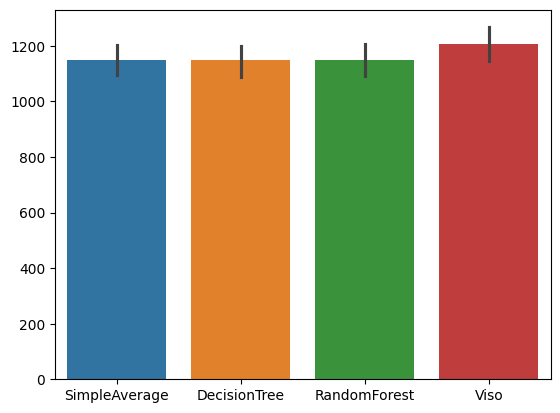

In [211]:
df_for_plot = Results_2.drop(columns=['month', 'weekday', 'hour', 'ltu'])
fig, ax = plt.subplots()
sns.barplot(data=df_for_plot)
plt.show()

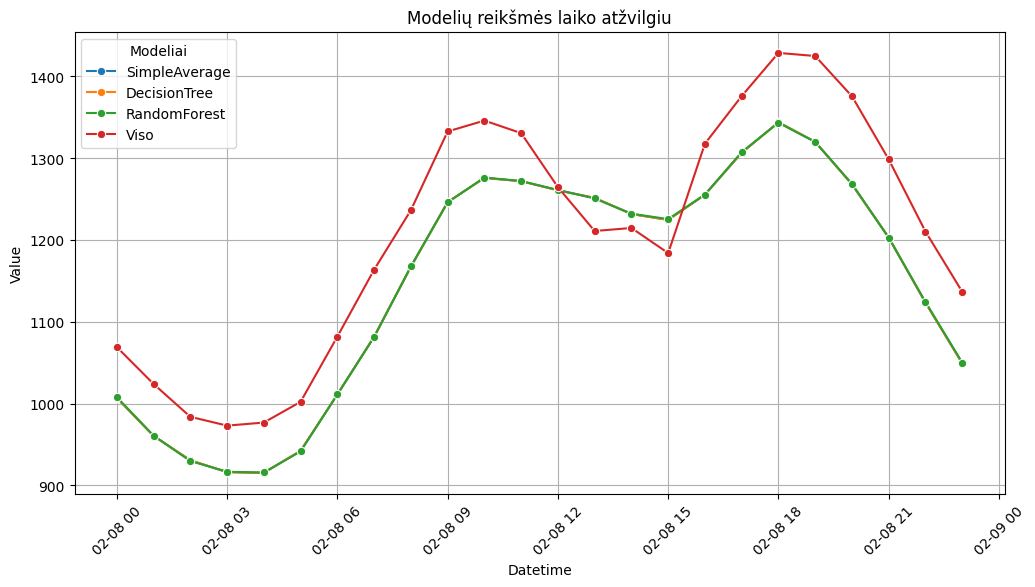

In [213]:
df_melted = df_for_plot.melt(id_vars=['datetime'], var_name='Model', value_name='Value')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Value', hue='Model', marker='o')

plt.xticks(rotation=45)
plt.xlabel("Datetime")
plt.ylabel("Value")
plt.title("Modelių reikšmės laiko atžvilgiu")
plt.legend(title="Modeliai")
plt.grid()

plt.show()


In [246]:
nordpool = pd.read_csv('Data/nordpool copy 2.csv').reset_index()

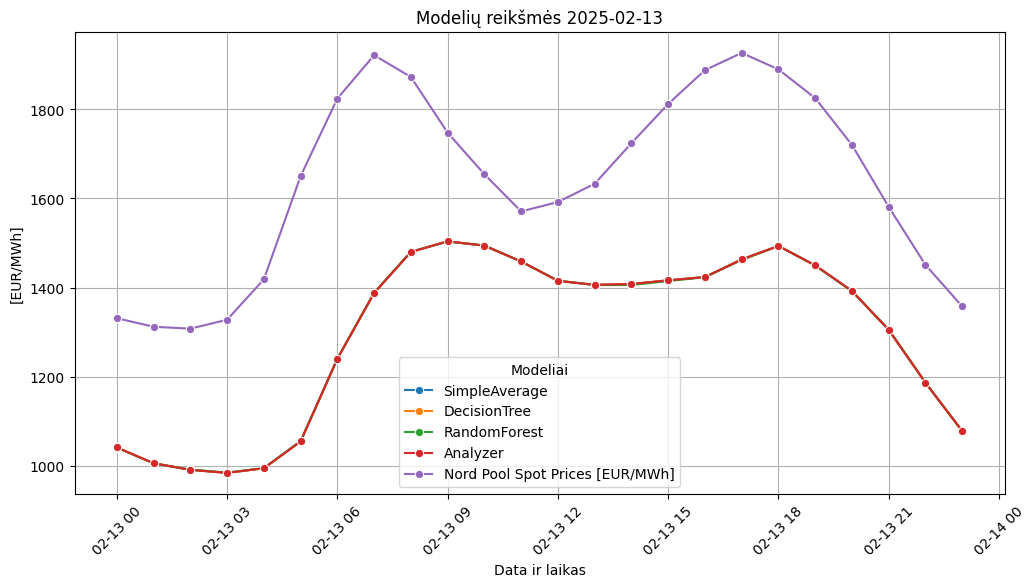

In [274]:
df_for_plot = Results.drop(columns=['month', 'weekday', 'hour']).reset_index()
df_for_plot = pd.merge(df_for_plot, nordpool, on='index', how='inner').drop(columns='index')
df_melted = df_for_plot.melt(id_vars=['datetime'], var_name='Model', value_name='Value')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Value', hue='Model', marker='o')

plt.xticks(rotation=45)
plt.xlabel("Data ir laikas")
plt.ylabel("[EUR/MWh]")
plt.title("Modelių reikšmės 2025-02-13")
plt.legend(title="Modeliai")
plt.grid()

plt.show()

In [228]:
nordpool = pd.read_csv('Data/nordpool copy 2.csv')